In [4]:
import orjson
import pandas as pd
import matplotlib.pyplot as plt
from cointegration import calculate_cointegration, calculate_spread, calculate_zscore

In [5]:
market_prices = orjson.loads(open("../../marketPrices.json","r").read())
market_prices

{'UNI-USD': [{'startedAt': '2023-04-13T20:00:00.000Z',
   'updatedAt': '2023-04-13T20:41:20.394Z',
   'market': 'UNI-USD',
   'resolution': '1HOUR',
   'low': '6.183',
   'high': '6.207',
   'open': '6.185',
   'close': '6.189',
   'baseTokenVolume': '383.6',
   'trades': '9',
   'usdVolume': '2376.4361',
   'startingOpenInterest': '363385.5'},
  {'startedAt': '2023-04-13T19:00:00.000Z',
   'updatedAt': '2023-04-13T19:57:03.116Z',
   'market': 'UNI-USD',
   'resolution': '1HOUR',
   'low': '6.193',
   'high': '6.204',
   'open': '6.193',
   'close': '6.204',
   'baseTokenVolume': '32',
   'trades': '2',
   'usdVolume': '198.352',
   'startingOpenInterest': '363385.5'},
  {'startedAt': '2023-04-13T18:00:00.000Z',
   'updatedAt': '2023-04-13T18:00:51.779Z',
   'market': 'UNI-USD',
   'resolution': '1HOUR',
   'low': '6.229',
   'high': '6.237',
   'open': '6.229',
   'close': '6.237',
   'baseTokenVolume': '49.9',
   'trades': '2',
   'usdVolume': '311.2023',
   'startingOpenInterest': '

In [8]:
sym1 = 'AAVE-USD'
sym2 = 'MATIC-USD'

prices1 = [ float(c['close']) for c in market_prices[sym1]]
prices2 = [ float(c['close']) for c in market_prices[sym1]]

zscore_window = 21

coint = calculate_cointegration(prices1, prices2)
spread = calculate_spread(prices1, prices2, coint['hedgeRatio'])
zScore = calculate_zscore(spread, zscore_window)

/home/soheil/projects/statistical-arbitrage-bot/venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(


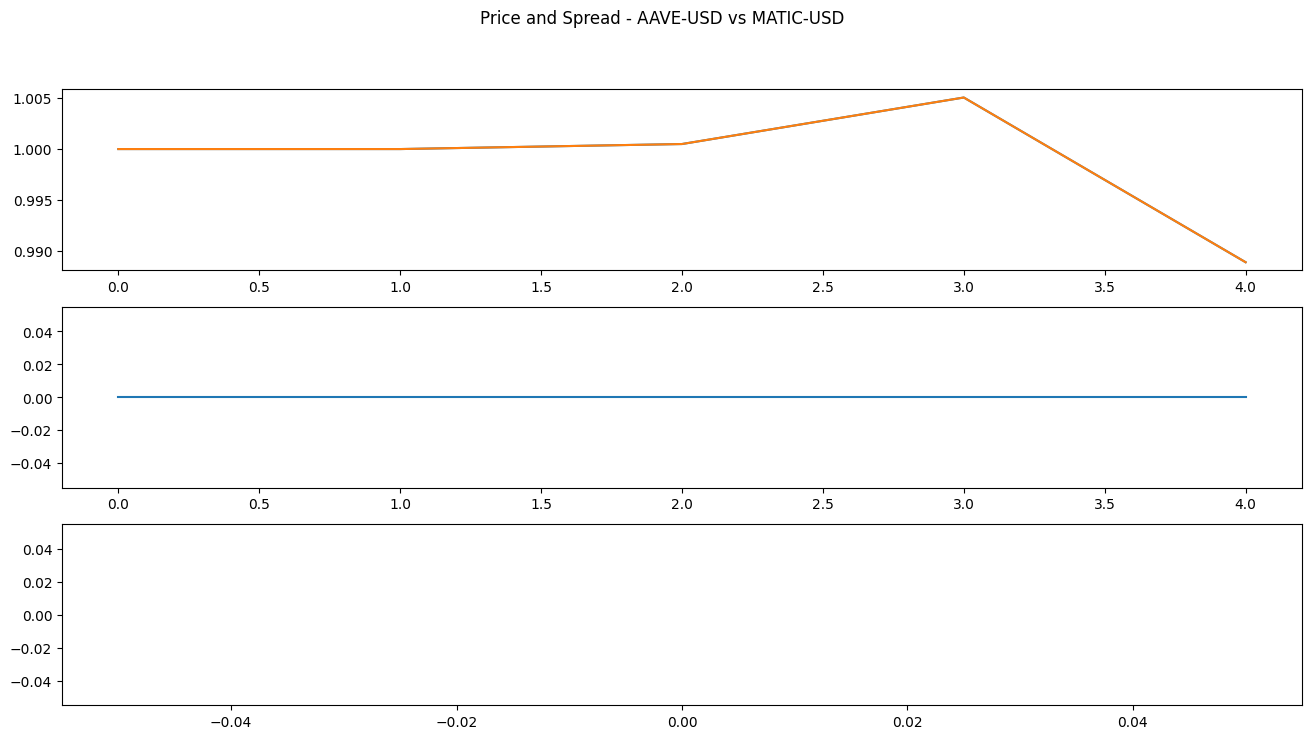

In [9]:
df = pd.DataFrame()
df[sym1] = prices1
df[sym2] = prices2
df[f'{sym1}_pct'] = df[sym1] / prices1[0]
df[f'{sym2}_pct'] = df[sym2] / prices2[0]

series1 = df[f'{sym1}_pct'].astype(float).values
series2 = df[f'{sym2}_pct'].astype(float).values

fig, axs = plt.subplots(3, figsize=(16, 8))
fig.suptitle(f'Price and Spread - {sym1} vs {sym2}')
axs[0].plot(series1)
axs[0].plot(series2)
axs[1].plot(spread)
axs[2].plot(zScore)

plt.show()


In [10]:
df2 = pd.DataFrame()
df2[sym1] = prices1
df2[sym2] = prices2
df2["Spread"] = spread
df2["ZScore"] = zScore 
df2

,AAVE-USD,MATIC-USD,Spread,ZScore
0,81.15,81.15,0.0,NaN
1,81.15,81.15,0.0,NaN
2,81.19,81.19,0.0,NaN
3,81.56,81.56,0.0,NaN
4,80.25,80.25,0.0,NaN
